# DCGAN for Image Generation

In [1]:
!pip install torch torchvision matplotlib

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


In [3]:
# Transformations for CIFAR-10
transform = transforms.Compose([
    transforms.Resize(32),
    transforms.ToTensor(),
    transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])  # Normalize to [-1, 1]
])

# Load CIFAR-10 dataset
batch_size = 128
train_loader = torch.utils.data.DataLoader(
    torchvision.datasets.CIFAR10(root='.', train=True, transform=transform, download=True),
    batch_size=batch_size, shuffle=True
)

100%|██████████| 170M/170M [00:13<00:00, 12.4MB/s]


Extracting ./cifar-10-python.tar.gz to .


In [4]:
class Generator(nn.Module):
    def __init__(self, z_dim=100, img_channels=3):
        super(Generator, self).__init__()
        self.gen = nn.Sequential(
            nn.ConvTranspose2d(z_dim, 512, 4, 1, 0, bias=False),
            nn.BatchNorm2d(512),
            nn.ReLU(True),
            nn.ConvTranspose2d(512, 256, 4, 2, 1, bias=False),
            nn.BatchNorm2d(256),
            nn.ReLU(True),
            nn.ConvTranspose2d(256, 128, 4, 2, 1, bias=False),
            nn.BatchNorm2d(128),
            nn.ReLU(True),
            nn.ConvTranspose2d(128, img_channels, 4, 2, 1, bias=False),
            nn.Tanh()
        )

    def forward(self, x):
        return self.gen(x)

In [5]:
class Discriminator(nn.Module):
    def __init__(self, img_channels=3):
        super(Discriminator, self).__init__()
        self.disc = nn.Sequential(
            nn.Conv2d(img_channels, 128, 4, 2, 1, bias=False),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(128, 256, 4, 2, 1, bias=False),
            nn.BatchNorm2d(256),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(256, 512, 4, 2, 1, bias=False),
            nn.BatchNorm2d(512),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(512, 1, 4, 1, 0, bias=False),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.disc(x)

In [6]:
z_dim = 100  # Dimension of the noise vector
img_channels = 3

generator = Generator(z_dim=z_dim, img_channels=img_channels).to(device)
discriminator = Discriminator(img_channels=img_channels).to(device)

# Optimizers
lr = 0.0002
beta1 = 0.5  # Recommended value for DCGANs
G_optimizer = optim.Adam(generator.parameters(), lr=lr, betas=(beta1, 0.999))
D_optimizer = optim.Adam(discriminator.parameters(), lr=lr, betas=(beta1, 0.999))

# Loss function
criterion = nn.BCELoss()

Epoch [1/100] | D Loss: 0.5004 | G Loss: 6.1148
Epoch [2/100] | D Loss: 0.6879 | G Loss: 3.1671
Epoch [3/100] | D Loss: 0.5764 | G Loss: 3.1165
Epoch [4/100] | D Loss: 0.5577 | G Loss: 3.6425
Epoch [5/100] | D Loss: 0.5919 | G Loss: 3.2681
Epoch [6/100] | D Loss: 0.5822 | G Loss: 3.4264
Epoch [7/100] | D Loss: 0.5852 | G Loss: 3.2081
Epoch [8/100] | D Loss: 0.6168 | G Loss: 3.1098
Epoch [9/100] | D Loss: 0.3931 | G Loss: 3.8070
Epoch [10/100] | D Loss: 0.4890 | G Loss: 3.5412
Epoch [11/100] | D Loss: 0.4142 | G Loss: 3.7068
Epoch [12/100] | D Loss: 0.3885 | G Loss: 3.9629
Epoch [13/100] | D Loss: 0.3320 | G Loss: 3.8082
Epoch [14/100] | D Loss: 0.3669 | G Loss: 3.8613
Epoch [15/100] | D Loss: 0.3607 | G Loss: 3.8743
Epoch [16/100] | D Loss: 0.4188 | G Loss: 3.8341
Epoch [17/100] | D Loss: 0.3187 | G Loss: 3.8097
Epoch [18/100] | D Loss: 0.3408 | G Loss: 3.8338
Epoch [19/100] | D Loss: 0.4500 | G Loss: 3.7364
Epoch [20/100] | D Loss: 0.3029 | G Loss: 3.7432


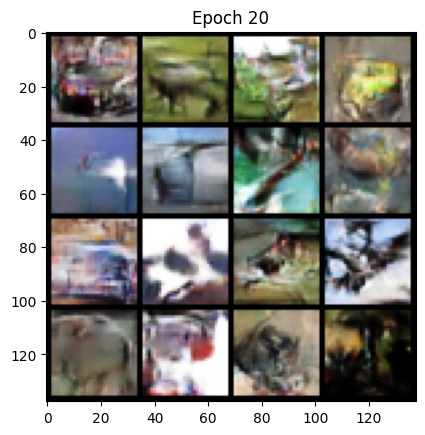

Epoch [21/100] | D Loss: 0.3463 | G Loss: 3.9750
Epoch [22/100] | D Loss: 0.3203 | G Loss: 3.9006
Epoch [23/100] | D Loss: 0.3258 | G Loss: 3.9856
Epoch [24/100] | D Loss: 0.3412 | G Loss: 3.8937
Epoch [25/100] | D Loss: 0.2989 | G Loss: 3.9259
Epoch [26/100] | D Loss: 0.3617 | G Loss: 3.8937
Epoch [27/100] | D Loss: 0.3855 | G Loss: 4.0122
Epoch [28/100] | D Loss: 0.3528 | G Loss: 3.8048
Epoch [29/100] | D Loss: 0.2676 | G Loss: 3.8371
Epoch [30/100] | D Loss: 0.4055 | G Loss: 3.8249
Epoch [31/100] | D Loss: 0.3391 | G Loss: 3.8851
Epoch [32/100] | D Loss: 0.3693 | G Loss: 3.7165
Epoch [33/100] | D Loss: 0.3703 | G Loss: 3.7846
Epoch [34/100] | D Loss: 0.3988 | G Loss: 3.8028
Epoch [35/100] | D Loss: 0.3399 | G Loss: 3.7774
Epoch [36/100] | D Loss: 0.3319 | G Loss: 3.8711
Epoch [37/100] | D Loss: 0.4197 | G Loss: 3.7464
Epoch [38/100] | D Loss: 0.2516 | G Loss: 3.7352
Epoch [39/100] | D Loss: 0.3245 | G Loss: 3.9835
Epoch [40/100] | D Loss: 0.3755 | G Loss: 3.8398


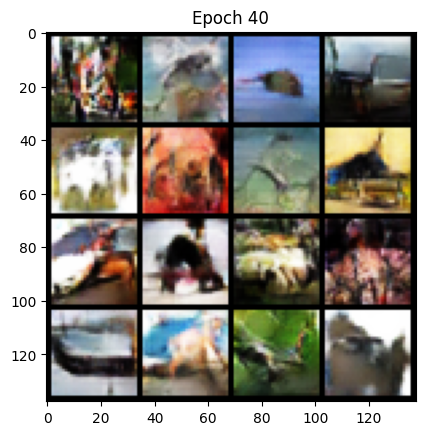

Epoch [41/100] | D Loss: 0.2522 | G Loss: 3.9117
Epoch [42/100] | D Loss: 0.3204 | G Loss: 4.0050
Epoch [43/100] | D Loss: 0.4541 | G Loss: 3.8682
Epoch [44/100] | D Loss: 0.2539 | G Loss: 3.9456
Epoch [45/100] | D Loss: 0.3374 | G Loss: 3.9931
Epoch [46/100] | D Loss: 0.3077 | G Loss: 3.9617
Epoch [47/100] | D Loss: 0.2798 | G Loss: 3.9690
Epoch [48/100] | D Loss: 0.3429 | G Loss: 4.0728
Epoch [49/100] | D Loss: 0.2160 | G Loss: 4.1406
Epoch [50/100] | D Loss: 0.3889 | G Loss: 4.0637
Epoch [51/100] | D Loss: 0.2995 | G Loss: 4.0525
Epoch [52/100] | D Loss: 0.2409 | G Loss: 4.0883
Epoch [53/100] | D Loss: 0.3594 | G Loss: 4.1208
Epoch [54/100] | D Loss: 0.3126 | G Loss: 4.1530
Epoch [55/100] | D Loss: 0.3612 | G Loss: 4.1409
Epoch [56/100] | D Loss: 0.1659 | G Loss: 4.1010
Epoch [57/100] | D Loss: 0.2943 | G Loss: 4.1492
Epoch [58/100] | D Loss: 0.4128 | G Loss: 4.0693
Epoch [59/100] | D Loss: 0.2656 | G Loss: 4.2651
Epoch [60/100] | D Loss: 0.4109 | G Loss: 3.9733


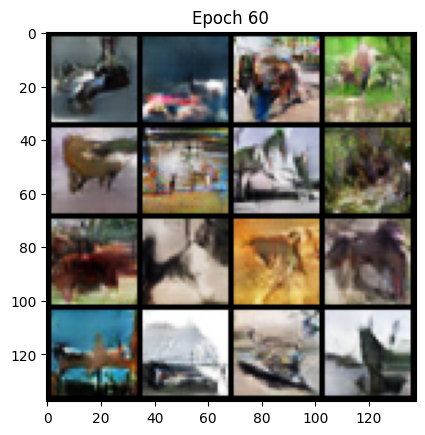

Epoch [61/100] | D Loss: 0.3328 | G Loss: 4.0771
Epoch [62/100] | D Loss: 0.1373 | G Loss: 4.1899
Epoch [63/100] | D Loss: 0.4540 | G Loss: 4.1333
Epoch [64/100] | D Loss: 0.2160 | G Loss: 4.2222
Epoch [65/100] | D Loss: 0.3864 | G Loss: 4.1332
Epoch [66/100] | D Loss: 0.3194 | G Loss: 4.1238
Epoch [67/100] | D Loss: 0.3278 | G Loss: 4.2183
Epoch [68/100] | D Loss: 0.2588 | G Loss: 4.1061
Epoch [69/100] | D Loss: 0.2922 | G Loss: 4.1946
Epoch [70/100] | D Loss: 0.3457 | G Loss: 4.1799
Epoch [71/100] | D Loss: 0.2113 | G Loss: 4.1979
Epoch [72/100] | D Loss: 0.3683 | G Loss: 4.1096
Epoch [73/100] | D Loss: 0.2517 | G Loss: 4.2445
Epoch [74/100] | D Loss: 0.3337 | G Loss: 4.2258
Epoch [75/100] | D Loss: 0.1265 | G Loss: 4.3635
Epoch [76/100] | D Loss: 0.4345 | G Loss: 4.2179
Epoch [77/100] | D Loss: 0.3211 | G Loss: 4.3459
Epoch [78/100] | D Loss: 0.1599 | G Loss: 4.2910
Epoch [79/100] | D Loss: 0.4720 | G Loss: 4.3480
Epoch [80/100] | D Loss: 0.2904 | G Loss: 4.2555


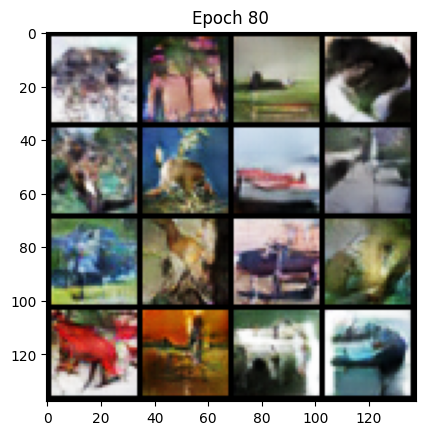

Epoch [81/100] | D Loss: 0.2416 | G Loss: 4.3636
Epoch [82/100] | D Loss: 0.3305 | G Loss: 4.1256
Epoch [83/100] | D Loss: 0.3016 | G Loss: 4.3195
Epoch [84/100] | D Loss: 0.2365 | G Loss: 4.1956
Epoch [85/100] | D Loss: 0.4459 | G Loss: 4.1383
Epoch [86/100] | D Loss: 0.1935 | G Loss: 4.1954
Epoch [87/100] | D Loss: 0.4006 | G Loss: 4.2282
Epoch [88/100] | D Loss: 0.2594 | G Loss: 4.2245
Epoch [89/100] | D Loss: 0.1846 | G Loss: 4.2593
Epoch [90/100] | D Loss: 0.3388 | G Loss: 4.3034
Epoch [91/100] | D Loss: 0.4260 | G Loss: 4.2153
Epoch [92/100] | D Loss: 0.3327 | G Loss: 4.2110
Epoch [93/100] | D Loss: 0.2488 | G Loss: 4.2621
Epoch [94/100] | D Loss: 0.3702 | G Loss: 4.2439
Epoch [95/100] | D Loss: 0.2819 | G Loss: 4.2510
Epoch [96/100] | D Loss: 0.2555 | G Loss: 4.3496
Epoch [97/100] | D Loss: 0.3510 | G Loss: 4.1554
Epoch [98/100] | D Loss: 0.2738 | G Loss: 4.2883
Epoch [99/100] | D Loss: 0.2465 | G Loss: 4.4133
Epoch [100/100] | D Loss: 0.2751 | G Loss: 4.3529


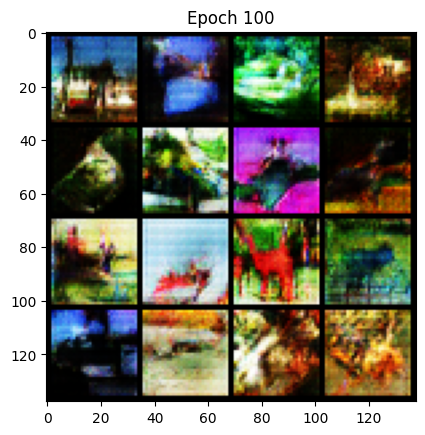

In [7]:
def train_discriminator(real_images, fake_images):
    D_optimizer.zero_grad()
    # Train on real images
    real_labels = torch.ones(real_images.size(0), 1, device=device)
    real_loss = criterion(discriminator(real_images).view(-1, 1), real_labels)

    # Train on fake images
    fake_labels = torch.zeros(fake_images.size(0), 1, device=device)
    fake_loss = criterion(discriminator(fake_images).view(-1, 1), fake_labels)

    # Backprop and optimize
    D_loss = real_loss + fake_loss
    D_loss.backward()
    D_optimizer.step()
    return D_loss.item()

def train_generator(fake_images):
    G_optimizer.zero_grad()
    labels = torch.ones(fake_images.size(0), 1, device=device)
    G_loss = criterion(discriminator(fake_images).view(-1, 1), labels)
    G_loss.backward()
    G_optimizer.step()
    return G_loss.item()

# Training parameters
epochs = 100
sample_interval = 20  # Save images every 20 epochs
D_losses, G_losses = [], []

for epoch in range(epochs):
    D_loss_epoch, G_loss_epoch = 0, 0
    for real_images, _ in train_loader:
        # Prepare real and fake images
        real_images = real_images.to(device)
        z = torch.randn(batch_size, z_dim, 1, 1, device=device)
        fake_images = generator(z)

        # Train discriminator and generator
        D_loss_epoch += train_discriminator(real_images, fake_images.detach())
        G_loss_epoch += train_generator(fake_images)

    # Calculate average losses for the epoch
    D_losses.append(D_loss_epoch / len(train_loader))
    G_losses.append(G_loss_epoch / len(train_loader))

    print(f"Epoch [{epoch+1}/{epochs}] | D Loss: {D_losses[-1]:.4f} | G Loss: {G_losses[-1]:.4f}")

    # Save generated images at intervals
    if (epoch + 1) % sample_interval == 0:
        with torch.no_grad():
            z = torch.randn(16, z_dim, 1, 1, device=device)
            generated_images = generator(z).cpu()
            grid_img = torchvision.utils.make_grid(generated_images, nrow=4, normalize=True)
            plt.imshow(grid_img.permute(1, 2, 0).numpy())
            plt.title(f"Epoch {epoch+1}")
            plt.show()

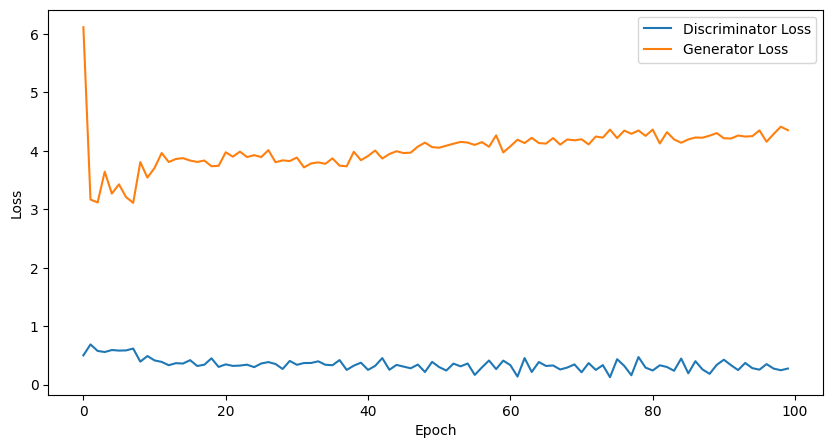

In [8]:
plt.figure(figsize=(10, 5))
plt.plot(D_losses, label="Discriminator Loss")
plt.plot(G_losses, label="Generator Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

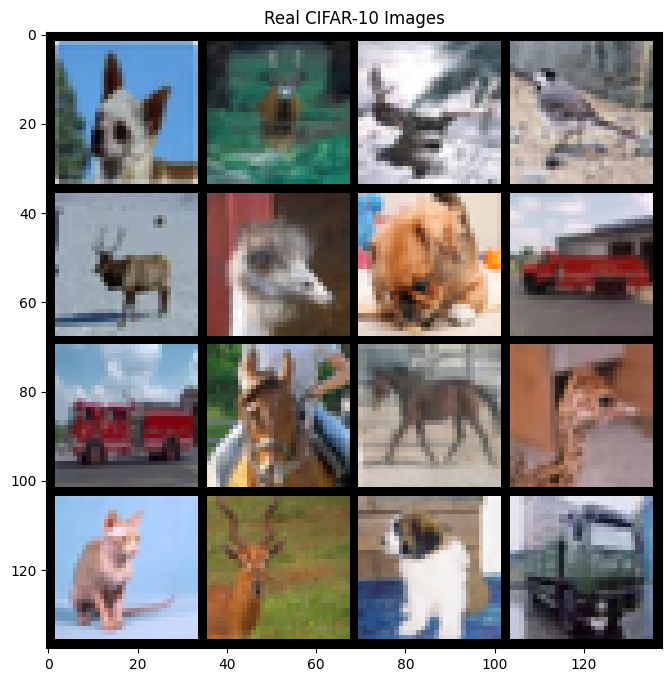

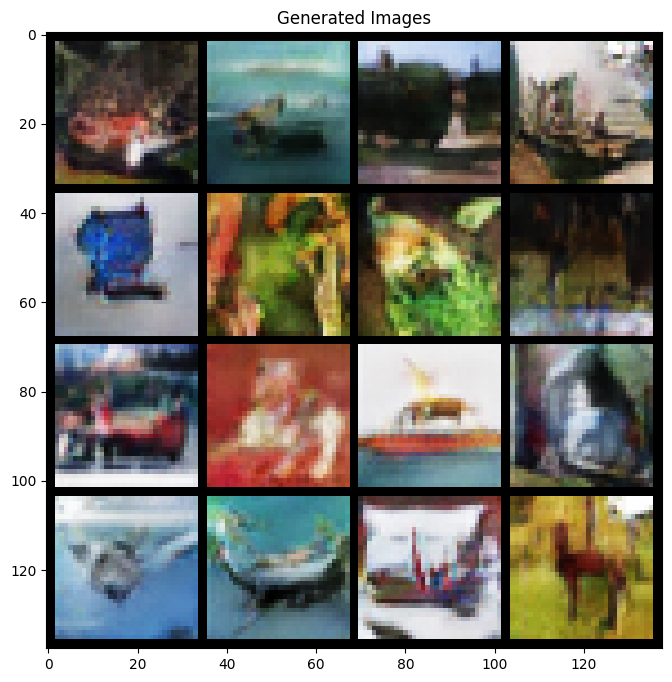

In [9]:
# Visualize real CIFAR-10 images
real_images, _ = next(iter(train_loader))
real_images = torchvision.utils.make_grid(real_images[:16], nrow=4, normalize=True)
plt.figure(figsize=(8, 8))
plt.imshow(real_images.permute(1, 2, 0).numpy())
plt.title("Real CIFAR-10 Images")
plt.show()

# Visualize generated images
with torch.no_grad():
    z = torch.randn(16, z_dim, 1, 1, device=device)
    generated_images = generator(z).cpu()
    generated_images = torchvision.utils.make_grid(generated_images, nrow=4, normalize=True)
    plt.figure(figsize=(8, 8))
    plt.imshow(generated_images.permute(1, 2, 0).numpy())
    plt.title("Generated Images")
    plt.show()